In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [6]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [7]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()
def save_polygon(polygon, fname):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.save(fname)

In [8]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()
def save_polygon_colors(polygon, colors, fname):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.save(fname)

In [9]:
def draw_polygon_tri(polygon,tri):
    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()
def save_polygon_tri(polygon,tri, fname):
    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.save(fname)

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

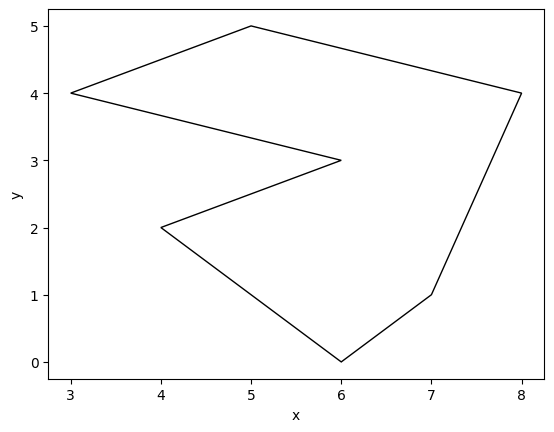

In [10]:
draw_polygon(polygon_example_1)

Wykonaj poniższy blok kodu aby wygenerować własny wielokąt.

Sterowanie:
  * Podwójne kliknięcie lewym przyciskiem myszy ustawia wierzchołek w danym miejscu.
  *  Podwójne kliknięcie prawym kończy tworzenie wielokątam zamykając go.

In [54]:
%matplotlib tk

drawn_polygon=[]
active=True

def draw_point(point):
    plt.scatter(point[0],point[1],color="red")
    plt.show()

def draw_line(points):
    ax=plt.gca()
    x=[points[0][0],points[1][0]]
    y=[points[0][1],points[1][1]]
    line=ax.plot(x,y,color="red") 
    ax.figure.canvas.draw()        

def onclick(event):
    global drawn_polygon, active
    
    if event.dblclick and active:
        # Mouse1 - dodawanie punktów
        if event.button == 1:
            drawn_polygon.append((event.xdata, event.ydata))
            draw_point(drawn_polygon[-1])
            if len(drawn_polygon) == 1: return
            draw_line([drawn_polygon[-1], drawn_polygon[-2]])
        # Mouse2 - domknij wielokąt i wyjdź
        if event.button == 3:
            active = False
            draw_line([drawn_polygon[-1], drawn_polygon[0]])
            plt.pause(1)
            plt.close()

fig, ax = plt.subplots()
# wygląd UI
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.aspect=1
plt.tight_layout()
# wejście w tryb interaktywny
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.ion()
plt.show()

[(np.float64(-5.789577430058337), np.float64(-6.586757637366749)), (np.float64(0.13367809162925326), np.float64(-3.0599351501573935)), (np.float64(-4.24329598860726), np.float64(-2.0626956882568166)), (np.float64(-0.4898224896010195), np.float64(0.15068945888836538)), (np.float64(-2.210684093796573), np.float64(1.7560017634112448)), (np.float64(-2.210684093796573), np.float64(1.7560017634112448)), (np.float64(-0.3027723152319375), np.float64(3.0694391034754194)), (np.float64(-1.599653524190904), np.float64(4.188293133900457)), (np.float64(-0.1281921524874612), np.float64(5.428761732849955)), (np.float64(-3.0711148958943486), np.float64(9.490688321566937))]


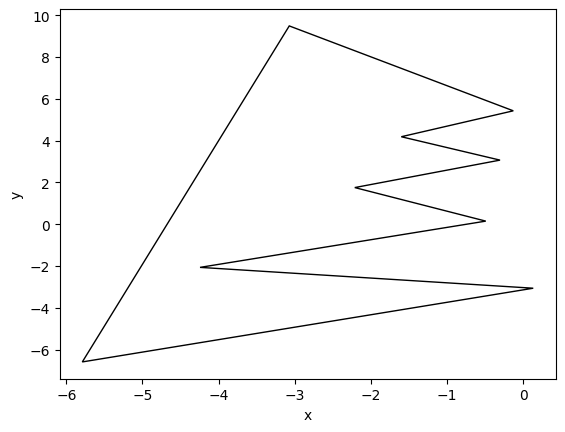

In [43]:
%matplotlib inline
if len(drawn_polygon)<3:
    print("Wielokąt musi mieć więcej niż 2 punkty.")
else:
    draw_polygon(drawn_polygon)
    print(drawn_polygon)

## Funkcje pomocnicze dla algorytmów

In [12]:
# > 0 jeżeli a->b->c tworzy skręt w lewo
def orient(a, b, c):
    return (
        a[0]*b[1]
        + b[0]*c[1]
        + a[1]*c[0]
        - b[1]*c[0]
        - c[1]*a[0]
        - a[1]*b[0]
    )

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [13]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    n = len(polygon)
    _, maxy_index = np.argmax(polygon, axis = 0)
    
    going_down = True

    i = maxy_index
    while True:
        nexti = (i + 1) % n
        if going_down and not polygon[i][1] > polygon[nexti][1]:
            going_down = False
        elif not going_down and not polygon[i][1] < polygon[nexti][1]:
            return False
        i = nexti
        if i == maxy_index:
            break
    return True

Przeprowadź test poprawności powyższej funkcji.

In [14]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.005s


Sprawdź monotoniczność swojego wielokątu.

In [15]:
print(is_y_monotonic(drawn_polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

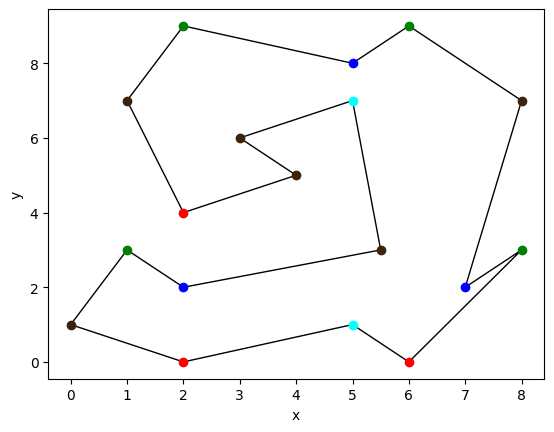

In [16]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [17]:
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    previ = 0
    i = 1
    nexti = 2
    
    cats = [None for _ in range(n)]
    while True:
        ort = orient(polygon[previ], polygon[i], polygon[nexti])
        
        if polygon[i][1] > polygon[previ][1] and polygon[i][1] > polygon[nexti][1]:
            if ort > 0: cats[i] = 0
            else: cats[i] = 3
        elif polygon[i][1] < polygon[previ][1] and polygon[i][1] < polygon[nexti][1]:
            if ort > 0: cats[i] = 1
            else: cats[i] = 2
        else:
            cats[i] = 4
        previ = i
        i = nexti
        nexti = (i + 1) % n
        if i == 1:
            break
    return cats

Przeprowadź test poprawności powyższej funkcji. 

In [18]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.003s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

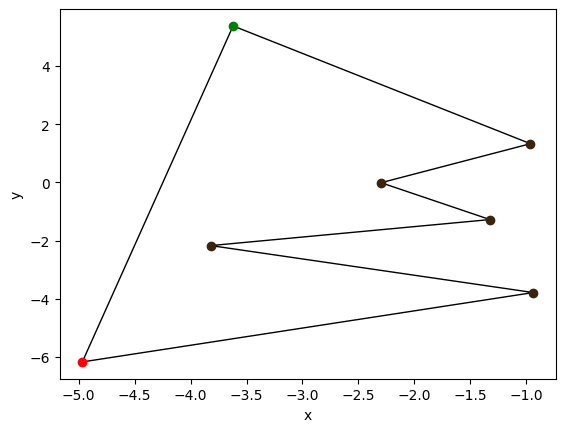

In [19]:
colors = color_vertex(drawn_polygon)
draw_polygon_colors(drawn_polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

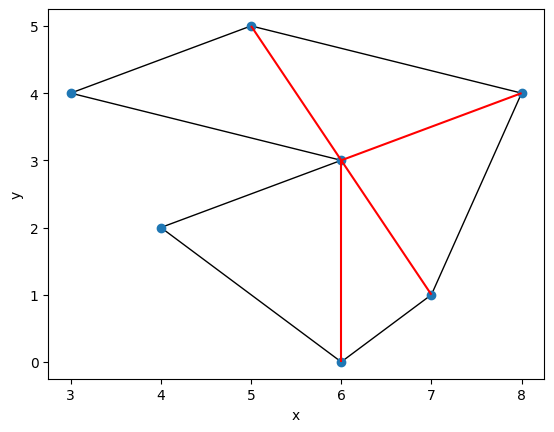

In [20]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [21]:
def sort_into_chains(polygon, miny_idx, maxy_idx):
    """
    Dzielimy wierzchołki wielokąta monotonicznego
    na dwa łańcuchy.
    """
    chain1 = []
    chain2 = []
    
    i = maxy_idx
    curr_chain = 0
    while True:
        if curr_chain == 0:
            chain1.append(i)
        else:
            chain2.append(i)
        
        i = (i + 1) % len(polygon)
        if i == miny_idx:
            curr_chain = 1  
        elif i == maxy_idx:
            break
    chain2.reverse()
    return chain1, chain2

In [22]:
def mergesort_chains(polygon, chain1, chain2):
    """
    Łączymy dwa łańcuchy w posortowaną listę
    (liniowo, mergesortem)
    """
    n = len(chain1) + len(chain2)
    srtd = [None for _ in range(n)]
    which_chain = [0 for _ in range(n)]
    chain1_idx = 0
    chain2_idx = 0
    i = 0
    while chain1_idx < len(chain1) and chain2_idx < len(chain2):
        if polygon[chain1[chain1_idx]][1] >= polygon[chain2[chain2_idx]][1]:
            srtd[i] = chain1[chain1_idx]
            which_chain[chain1[chain1_idx]] = 1
            chain1_idx += 1
        else:
            srtd[i] = chain2[chain2_idx]
            which_chain[chain2[chain2_idx]] = 2
            chain2_idx += 1
        i += 1
    flush_chain = chain1
    flush_chain_idx = chain1_idx
    flush_chain_num = 1
    if chain2_idx < len(chain2):
        flush_chain = chain2
        flush_chain_idx = chain2_idx
        flush_chain_num = 2
    while flush_chain_idx < len(flush_chain):
        srtd[i] = flush_chain[flush_chain_idx]
        which_chain[flush_chain[flush_chain_idx]] = flush_chain_num
        flush_chain_idx += 1
        i += 1
    which_chain[srtd[0]] = 3
    which_chain[srtd[-1]] = 3

    return srtd, which_chain

In [25]:
def in_polygon(polygon, a, b, c, which_chain):
    """
    Funkcja sprawdza czy trójkąt a->b->c
    należy do wielokątu
    """
    chain = which_chain[b] & which_chain[c]
    if chain == 1:
        return orient(polygon[a], polygon[b], polygon[c]) > 0
    else:
        return orient(polygon[a], polygon[b], polygon[c]) < 0

In [24]:
def is_edge(a, b, n):
    return abs(a - b) == 1 or abs(a - b) == n - 1

In [ ]:
def triangulation_diagonals(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    n = len(polygon)
    _, maxy_idx = np.argmax(polygon, axis = 0)
    _, miny_idx = np.argmin(polygon, axis = 0)
 
    chain1, chain2 = sort_into_chains(polygon, miny_idx, maxy_idx)
    
    sorted_polygon, which_chain = mergesort_chains(polygon, chain1, chain2)
    chains_eq = lambda a, b : (which_chain[a] & which_chain[b]) != 0
    
    result = []
    stack = [sorted_polygon[0], sorted_polygon[1]]
    for i in range(2, n):
        curr = sorted_polygon[i]
        top = stack[-1]
        
        if not chains_eq(curr, top):
            # łączymy ze wszystkim na stosie
            while len(stack) > 0:
                popd = stack.pop()
                if not is_edge(popd, curr, n):
                    result.append((popd, curr))
            stack.append(sorted_polygon[i - 1])
            stack.append(sorted_polygon[i])
        else:
            popd = stack.pop()
            top = stack[-1]
            # łączymy trójkąty na stosie jeżeli są wewnątrz wielokąta
            while(in_polygon(polygon, top, popd, curr, which_chain)):
                if not is_edge(top, curr, n):
                    result.append((top, curr))
                popd = stack.pop()
                if len(stack) == 0: break
                top = stack[-1]
            stack.append(popd)
            stack.append(curr)
    return result

Przeprowadź testy poprawności powyższej funkcji.


In [41]:
Test().runtest(3, triangulation_diagonals)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.006s


Funkcja `triangulation` zwraca wynik w postaci krotek wierzchołków tworzących wymagane przekątne, 
częsciej jednak jako wynik triangulacji przyjmuje się krotki wierzchołków tworzących każdy trójkąt.
Funkcja `convert_to_triangles` zamienia wynik `triangulation` na wyżej wspomniany.

In [28]:
def triangulation_triangles(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica dodawanych po kolei trójkątów (reprezentowanych jako krotki indeksów ich wierzchołków)
    """
    n = len(polygon)
    _, maxy_idx = np.argmax(polygon, axis = 0)
    _, miny_idx = np.argmin(polygon, axis = 0)
 
    chain1, chain2 = sort_into_chains(polygon, miny_idx, maxy_idx)
    
    sorted_polygon, which_chain = mergesort_chains(polygon, chain1, chain2)
    chains_eq = lambda a, b : (which_chain[a] & which_chain[b]) != 0
    
    result = []
    stack = [sorted_polygon[0], sorted_polygon[1]]
    for i in range(2, n):
        curr = sorted_polygon[i]
        top = stack[-1]
        
        if not chains_eq(curr, top):
            # łączymy ze wszystkim na stosie
            while len(stack) > 0:
                popd = stack.pop()
                if len(stack) != 0:
                    result.append((popd, stack[-1], curr))
            stack.append(sorted_polygon[i - 1])
            stack.append(sorted_polygon[i])
        else:
            popd = stack.pop()
            top = stack[-1]
            # łączymy trójkąty na stosie jeżeli są wewnątrz wielokąta
            while(in_polygon(polygon, top, popd, curr, which_chain)):
                result.append((popd, top, curr))
                popd = stack.pop()
                if len(stack) == 0: break
                top = stack[-1]
            stack.append(popd)
            stack.append(curr)
    return result

### Wizualizacja triangulacji

In [29]:
def draw_triangulation_triangles(polygon):
    tri = triangulation_triangles(polygon)    
    edges = []
    for (a, b, c) in tri:
        edges.append((polygon[a], polygon[b]))
        edges.append((polygon[b], polygon[c]))
        edges.append((polygon[c], polygon[a]))
    draw_polygon_tri(polygon, edges)
def save_triangulation_triangles(polygon):
    tri = triangulation_triangles(polygon, fname)    
    edges = []
    for (a, b, c) in tri:
        edges.append((polygon[a], polygon[b]))
        edges.append((polygon[b], polygon[c]))
        edges.append((polygon[c], polygon[a]))
    save_polygon_tri(polygon, edges, fname)

In [30]:
def draw_triangulation_diagonals(polygon):
    tri = triangulation_diagonals(polygon)    
    draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])
def save_triangulation_diagonals(polygon, fname):
    tri = triangulation_diagonals(polygon)    
    save_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri], fname)

 - Wynikiem są trójkąty:  

[(np.int64(8), np.int64(9), np.int64(7)), (np.int64(6), np.int64(7), np.int64(5)), (np.int64(7), np.int64(9), np.int64(5)), (np.int64(5), np.int64(9), np.int64(4)), (np.int64(3), np.int64(4), np.int64(2)), (np.int64(4), np.int64(9), np.int64(2)), (np.int64(1), np.int64(2), np.int64(0)), (np.int64(2), np.int64(9), np.int64(0))]


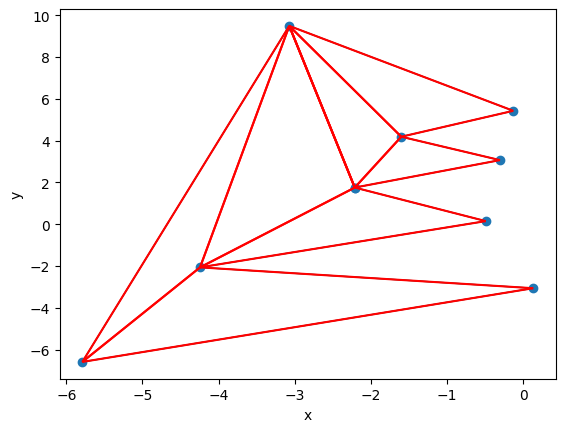

In [52]:
draw_triangulation_triangles(drawn_polygon)
print(triangulation_triangles(drawn_polygon))

- Wynikiem są przekątne:

[(np.int64(9), np.int64(7)), (np.int64(7), np.int64(5)), (np.int64(9), np.int64(5)), (np.int64(9), np.int64(4)), (np.int64(4), np.int64(2)), (np.int64(9), np.int64(2)), (np.int64(2), np.int64(0))]


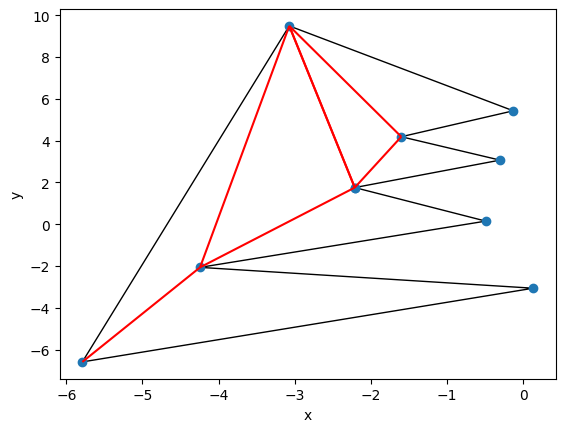

In [53]:
draw_triangulation_diagonals(drawn_polygon)
print(triangulation_diagonals(drawn_polygon))

### Generowanie animacji

In [50]:
def triangulation_diagonals_draw(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    n = len(polygon)
    _, maxy_idx = np.argmax(polygon, axis = 0)
    _, miny_idx = np.argmin(polygon, axis = 0)
 
    chain1, chain2 = sort_into_chains(polygon, miny_idx, maxy_idx)
    
    sorted_polygon, which_chain = mergesort_chains(polygon, chain1, chain2)
    chains_eq = lambda a, b : (which_chain[a] & which_chain[b]) != 0
    
    vis = Visualizer()
    vis.add_polygon(polygon, fill=False)
    vis.add_point(polygon)
    
    result = []
    stack = [sorted_polygon[0], sorted_polygon[1]]
    vis.add_point([polygon[stack[-1]], polygon[stack[-2]]], color="red")
    for i in range(2, n):
        curr = sorted_polygon[i]
        top = stack[-1]
        
        if not chains_eq(curr, top):
            # łączymy ze wszystkim na stosie
            while len(stack) > 0:
                popd = stack.pop()
                vis.add_point(polygon[popd], color="brown")
                if not is_edge(popd, curr, n):
                    vis.add_line_segment([polygon[popd], polygon[curr]], color="red")
                    result.append((popd, curr))
            stack.append(sorted_polygon[i - 1])
            stack.append(sorted_polygon[i])
            vis.add_point([polygon[stack[-1]], polygon[stack[-2]]], color="red")
        else:
            popd = stack.pop()
            top = stack[-1]
            vis.add_point(polygon[popd], color="brown")
            # łączymy trójkąty na stosie jeżeli są wewnątrz wielokąta
            while(in_polygon(polygon, top, popd, curr, which_chain)):
                if not is_edge(top, curr, n):
                    vis.add_line_segment([polygon[top], polygon[curr]], color="red")
                    result.append((top, curr))
                popd = stack.pop()
                vis.add_point(polygon[popd], color="brown")
                if len(stack) == 0: break
                top = stack[-1]
            stack.append(popd)
            stack.append(curr)
            vis.add_point([polygon[stack[-1]], polygon[stack[-2]]], color="red")
    return result, vis

## Zbiory testowe

In [44]:
polygon_a = [(np.float64(-3.1209949423927696), np.float64(-6.562787960997823)), (np.float64(2.926960695540874), np.float64(-6.089449930807184)), (np.float64(4.573002229988795), np.float64(0.7739515069570828)), (np.float64(2.415690218932051), np.float64(5.98066983905411)), (np.float64(-2.7468945936546056), np.float64(5.412664202825345)), (np.float64(-4.754566465216084), np.float64(-0.054390045876536064))]
polygon_b = [(np.float64(-0.24042225710891074), np.float64(7.5900191417022835)), (np.float64(-3.794375570121465), np.float64(4.891992369615641)), (np.float64(-1.0010929662098427), np.float64(3.803314900177172)), (np.float64(-3.6946154771246213), np.float64(1.0816212265809977)), (np.float64(-1.31284325682498), np.float64(0.04027756016159145)), (np.float64(-3.5574453492539604), np.float64(-3.178421045134753)), (np.float64(3.5255212535219353), np.float64(-2.728749916453646)), (np.float64(2.2037000213137574), np.float64(0.2532796737473788)), (np.float64(3.263651009405221), np.float64(2.6673036277196385)), (np.float64(1.3806792540897987), np.float64(3.7086472941390447)), (np.float64(2.5279203235535004), np.float64(5.720333922449258))]
polygon_c = [(np.float64(-5.789577430058337), np.float64(-6.586757637366749)), (np.float64(0.13367809162925326), np.float64(-3.0599351501573935)), (np.float64(-4.24329598860726), np.float64(-2.0626956882568166)), (np.float64(-0.4898224896010195), np.float64(0.15068945888836538)), (np.float64(-2.210684093796573), np.float64(1.7560017634112448)), (np.float64(-2.210684093796573), np.float64(1.7560017634112448)), (np.float64(-0.3027723152319375), np.float64(3.0694391034754194)), (np.float64(-1.599653524190904), np.float64(4.188293133900457)), (np.float64(-0.1281921524874612), np.float64(5.428761732849955)), (np.float64(-3.0711148958943486), np.float64(9.490688321566937))]
polygon_d = [(np.float64(6.480914008553427), np.float64(-8.385139377231784)), (np.float64(5.358612962338938), np.float64(-6.965125286659866)), (np.float64(4.510652171865768), np.float64(-4.527434431178075)), (np.float64(4.3111319858720805), np.float64(-1.8767414621104965)), (np.float64(4.373482043995107), np.float64(0.6319500978998907)), (np.float64(4.560532218364187), np.float64(2.832971938286361)), (np.float64(5.134152753096039), np.float64(4.868325468106109)), (np.float64(6.11928367143987), np.float64(6.122671248111304)), (np.float64(-4.704686418717662), np.float64(-3.2020879466442853))]
polygon_e = [(np.float64(-4.343056081604104), np.float64(1.4602916507335095)), (np.float64(-1.9488138496798584), np.float64(2.4779684156433834)), (np.float64(-3.046174872645137), np.float64(5.010326877163303)), (np.float64(0.9816388821024233), np.float64(7.5900191417022835)), (np.float64(-0.5022925012256252), np.float64(-1.1904013183340698)), (np.float64(-6.088857709048868), np.float64(-0.7407301896529628)), (np.float64(-7.996769487613502), np.float64(1.034287423561933)), (np.float64(-9.019310440831148), np.float64(-2.6340823104155184)), (np.float64(-5.689817337061493), np.float64(-5.568778097597481)), (np.float64(-0.9262728964622102), np.float64(-3.9357618934397767)), (np.float64(1.4305593005882198), np.float64(-5.592444999107013)), (np.float64(4.859812497354721), np.float64(0.4426148858236356)), (np.float64(2.2535800678121802), np.float64(-0.4803942730481108)), (np.float64(4.186431869626023), np.float64(6.312006460187559)), (np.float64(1.7298395795787513), np.float64(9.72004027756016)), (np.float64(-0.8265128034653664), np.float64(8.110690974911988)), (np.float64(-6.699888278654535), np.float64(9.152034641331392)), (np.float64(-8.320989789853243), np.float64(6.525008573773347))]

### Wielokąt A

True
[(np.int64(4), np.int64(3), np.int64(2)), (np.int64(2), np.int64(4), np.int64(5)), (np.int64(5), np.int64(2), np.int64(1)), (np.int64(1), np.int64(5), np.int64(0))]


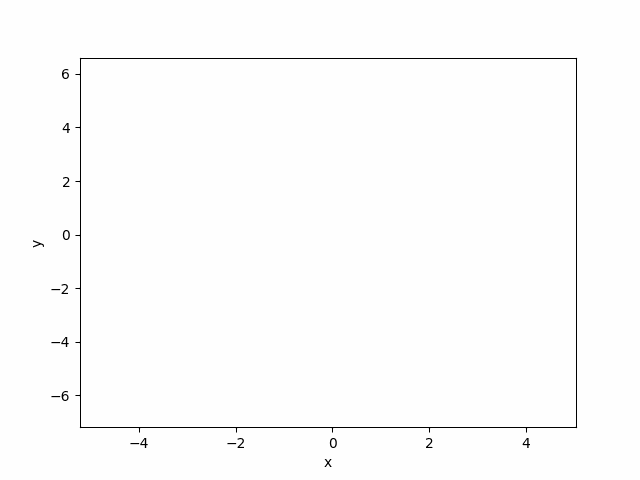

In [ ]:
save_polygon(polygon_a, "./res/pol_a")

print(is_y_monotonic(polygon_a))

colors = color_vertex(polygon_a)
save_polygon_colors(polygon_a,colors,"./res/pol_a_colors")

save_triangulation_diagonals(polygon_a, "./res/pol_a_tri")
print(triangulation_triangles(polygon_a))

_, vis = triangulation_diagonals_draw(polygon_a)
vis.save_gif("./res/pol_a_tri", interval=500)
vis.show_gif(interval=500)

### Wielokąt B

True
[(np.int64(10), np.int64(0), np.int64(1)), (np.int64(1), np.int64(10), np.int64(2)), (np.int64(2), np.int64(10), np.int64(9)), (np.int64(9), np.int64(2), np.int64(8)), (np.int64(8), np.int64(2), np.int64(3)), (np.int64(3), np.int64(8), np.int64(7)), (np.int64(7), np.int64(3), np.int64(4)), (np.int64(4), np.int64(7), np.int64(6)), (np.int64(6), np.int64(4), np.int64(5))]


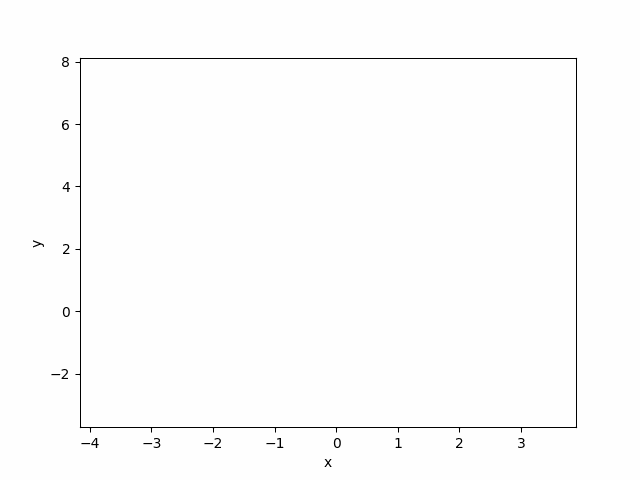

In [124]:
save_polygon(polygon_b, "./res/pol_b")

print(is_y_monotonic(polygon_b))

colors = color_vertex(polygon_b)
save_polygon_colors(polygon_b,colors,"./res/pol_b_colors")

save_triangulation_diagonals(polygon_b, "./res/pol_b_tri")
print(triangulation_triangles(polygon_b))

_, vis = triangulation_diagonals_draw(polygon_b)
vis.save_gif("./res/pol_b_tri", interval=500)
vis.show_gif(interval=500)

### Wielokąt C

False
[(np.int64(8), np.int64(9), np.int64(7)), (np.int64(6), np.int64(7), np.int64(5)), (np.int64(7), np.int64(9), np.int64(5)), (np.int64(5), np.int64(9), np.int64(4)), (np.int64(3), np.int64(4), np.int64(2)), (np.int64(4), np.int64(9), np.int64(2)), (np.int64(1), np.int64(2), np.int64(0)), (np.int64(2), np.int64(9), np.int64(0))]


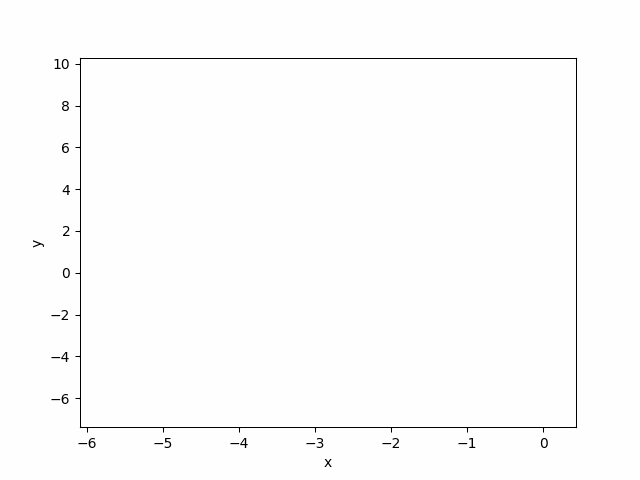

In [45]:
save_polygon(polygon_c, "./lab3/res/pol_c")

print(is_y_monotonic(polygon_c))

colors = color_vertex(polygon_c)
save_polygon_colors(polygon_c,colors,"./lab3/res/pol_c_colors")

save_triangulation_diagonals(polygon_c, "./lab3/res/pol_c_tri")
print(triangulation_triangles(polygon_c))

_, vis = triangulation_diagonals_draw(polygon_c)
vis.save_gif("./lab3/res/pol_c_tri", interval=500)
vis.show_gif(interval=500)

### Wielokąt D

True
[(np.int64(3), np.int64(4), np.int64(8)), (np.int64(4), np.int64(5), np.int64(8)), (np.int64(5), np.int64(6), np.int64(8)), (np.int64(6), np.int64(7), np.int64(8)), (np.int64(8), np.int64(3), np.int64(2)), (np.int64(2), np.int64(8), np.int64(1)), (np.int64(1), np.int64(8), np.int64(0))]


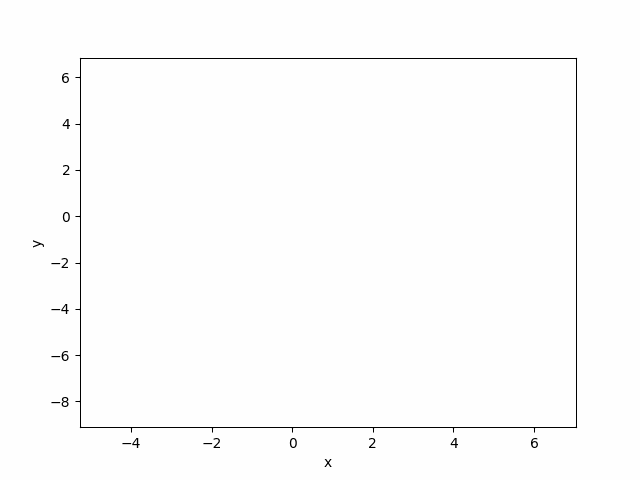

In [126]:
save_polygon(polygon_d, "./res/pol_d")

print(is_y_monotonic(polygon_d))

colors = color_vertex(polygon_d)
save_polygon_colors(polygon_d,colors,"./res/pol_d_colors")

save_triangulation_diagonals(polygon_d, "./res/pol_d_tri")
print(triangulation_triangles(polygon_d))

_, vis = triangulation_diagonals_draw(polygon_d)
vis.save_gif("./res/pol_d_tri", interval=500)
vis.show_gif(interval=500)

### Wielokąt E

False


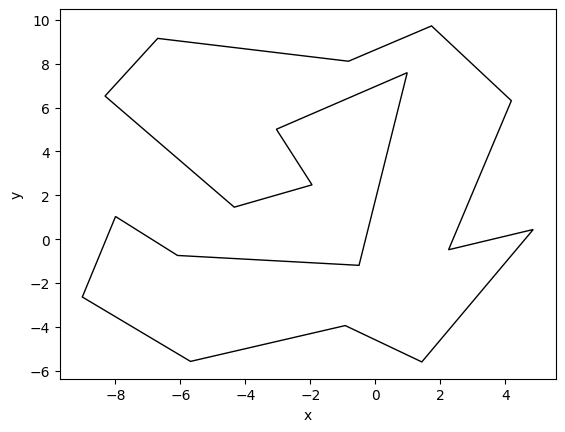

In [85]:
save_polygon(polygon_e, "./res/pol_e")

print(is_y_monotonic(polygon_e))

colors = color_vertex(polygon_e)
save_polygon_colors(polygon_e,colors,"./res/pol_e_colors")